In [1]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np

In [127]:
import random

In [205]:
masses = list(np.array([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7])*9.81)

In [25]:
distances = [0.0865,0.1015,0.1106,0.1279,0.1892,0.2695,0.2888,0.2425,0.3465,0.3225,0.3764,0.4263,0.4562]

In [206]:
results = dict(zip(masses, distances))

In [207]:
results

{0.9810000000000001: 0.0865,
 1.4715: 0.1015,
 1.9620000000000002: 0.1106,
 2.4525: 0.1279,
 2.943: 0.1892,
 3.4335: 0.2695,
 3.9240000000000004: 0.2888,
 4.4145: 0.2425,
 4.905: 0.3465,
 5.395500000000001: 0.3225,
 5.886: 0.3764,
 6.376500000000001: 0.4263,
 6.867: 0.4562}

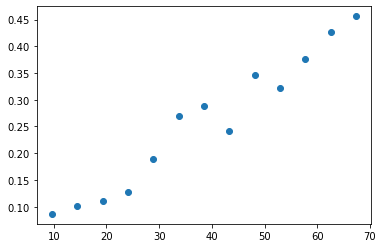

In [208]:
plt.scatter(np.array(masses)*9.81, distances)

We are now going to fit a line to this data. We will try to minimise the verticle distance of these points from the line.

In [28]:
def line(a,b,x):
    return a*x+b

In [47]:
def error(a,b):
    return sum(abs(np.array(distances)-line(a,b,np.array(masses))))

In [180]:
a_values = np.linspace(0,1000,200)
b_values = np.linspace(0,1000,200)
error_dict= {}
for a in a_values:
    for b in b_values:
        error_dict[(a,b)] = error(a,b)

In [50]:
error_dict 
#make 3d graph with x and y coordinates as keys and values as z values. check shape of the curve. if it has one or two minima

{(0.0, 0.0): 3.3443999999999994,
 (0.0, 0.5025125628140703): 3.1882633165829146,
 (0.0, 1.0050251256281406): 9.720926633165828,
 (0.0, 1.507537688442211): 16.253589949748743,
 (0.0, 2.0100502512562812): 22.786253266331656,
 (0.0, 2.5125628140703515): 29.318916582914568,
 (0.0, 3.015075376884422): 35.85157989949748,
 (0.0, 3.517587939698492): 42.384243216080385,
 (0.0, 4.0201005025125625): 48.91690653266332,
 (0.0, 4.522613065326633): 55.44956984924623,
 (0.0, 5.025125628140703): 61.982233165829136,
 (0.0, 5.527638190954773): 68.51489648241206,
 (0.0, 6.030150753768844): 75.04755979899497,
 (0.0, 6.532663316582914): 81.58022311557788,
 (0.0, 7.035175879396984): 88.11288643216079,
 (0.0, 7.537688442211055): 94.64554974874372,
 (0.0, 8.040201005025125): 101.17821306532662,
 (0.0, 8.542713567839195): 107.71087638190953,
 (0.0, 9.045226130653266): 114.24353969849247,
 (0.0, 9.547738693467336): 120.77620301507537,
 (0.0, 10.050251256281406): 127.30886633165828,
 (0.0, 10.552763819095476): 13

In [182]:
x_vals = []
y_vals = []
for values in list(error_dict.keys()):
    x = values[0]
    y = values[1]
    
    x_vals.append(x)
    y_vals.append(y)

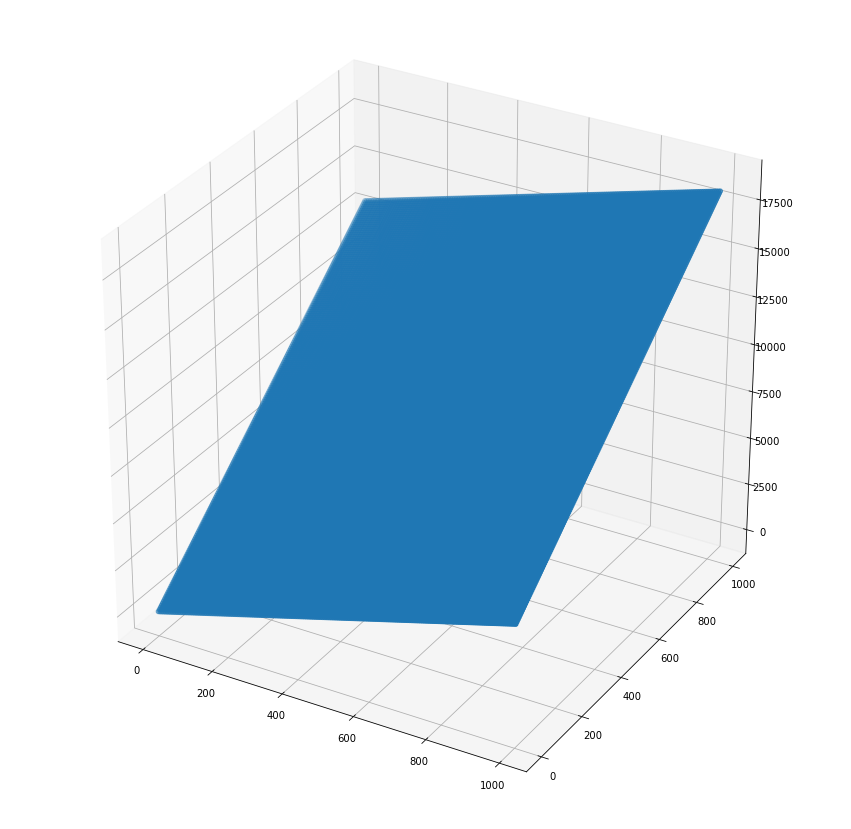

In [185]:

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter3D(x_vals, y_vals, list(error_dict.values()))

In [177]:
def error_square(a,b):
    return sum((np.array(distances)-line(a,b,np.array(masses)))**2)

In [193]:
a_values = np.linspace(-100,100,100)
b_values = np.linspace(-100,100,100)
error_dict_squares= {}
for a in a_values:
    for b in b_values:
        error_dict_squares[(a,b)] = error_square(a,b)

In [195]:
x_vals = []
y_vals = []
for values in list(error_dict_squares.keys()):
    x = values[0]
    y = values[1]
    
    x_vals.append(x)
    y_vals.append(y)

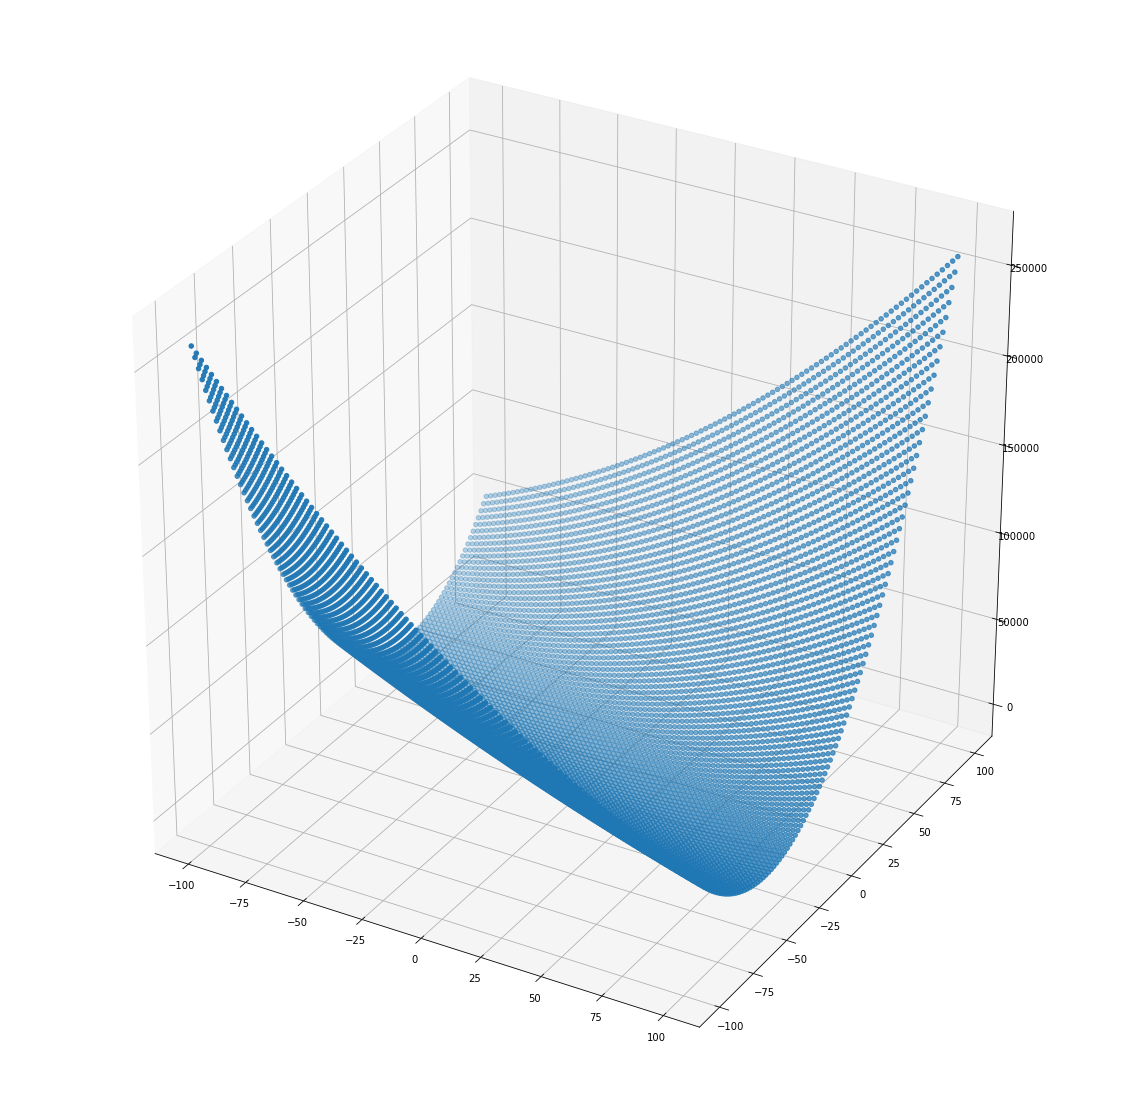

In [196]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

ax.scatter3D(x_vals, y_vals, list(error_dict_squares.values()))

The graph above shows the value of a and b from ax+b on x and y axis and the value of the error on the z axis. The minima to this paraboloid is the value of a and b for which the error is minimum, i.e. the regression line

### Fitting line to weights and distances data

In [209]:
np.polyfit(masses, distances, deg=1)

array([0.06471082, 0.00333626])

In [214]:
np.polyval(np.array([0.06471082, 0.00333626]), masses)

array([0.06681757, 0.09855823, 0.13029889, 0.16203955, 0.1937802 ,
       0.22552086, 0.25726152, 0.28900217, 0.32074283, 0.35248349,
       0.38422415, 0.4159648 , 0.44770546])

In [211]:
fitted_values = line(0.06471082, 0.00333626, np.array(masses))

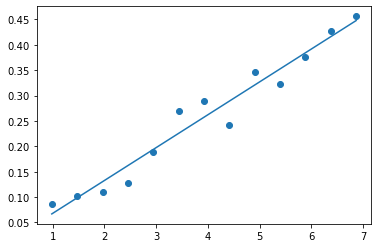

In [212]:
plt.plot(masses, fitted_values)
plt.scatter(masses, distances)

## Fitting n degree polynomials to data

C:\Users\Yogen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Yogen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Yogen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Yogen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


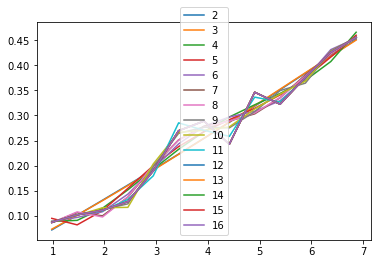

In [297]:
degrees = list(range(2,17))
predicted_values = []
for degree in degrees:
    model = np.polyfit(masses, distances, deg=degree)
    predicted_y_val = np.polyval(model, masses)
    plt.plot(masses,predicted_y_val, label=degree)
plt.legend(loc = 'best')

In [326]:
def r_squared(observed, predicted): #observed and predicted variables are arrays
    error = ((observed-predicted)**2).sum()
    mean_error = error/len(observed)
    variance = np.var(observed)
    return 1 - (mean_error/variance)

In [322]:
def generate_fits(x_vals, y_vals, degrees):
    models = []
    for degree in degrees:
        model = np.polyfit(x_vals, y_vals, degree)
        models.append(model)
    
    return models

In [349]:
def test_fits(models, degrees, x_vals, y_vals):
    plt.plot(x_vals, y_vals, label = "Data")
    for i in range(len(models)):
        predicted_vals = np.polyval(models[i], x_vals)
        error = r_squared(y_vals, predicted_vals)
        plt.plot(x_vals, predicted_vals, label = str(error)+"for Degree"+str(degrees[i]))
    plt.legend(loc='best')

In [350]:
degrees_to_fit = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
generated_models = generate_fits(masses, distances, degrees_to_fit)

<ipython-input-350-50b10036f6dc>:2: RankWarning: Polyfit may be poorly conditioned
  generated_models = generate_fits(masses, distances, degrees_to_fit)
<ipython-input-350-50b10036f6dc>:2: RankWarning: Polyfit may be poorly conditioned
  generated_models = generate_fits(masses, distances, degrees_to_fit)
<ipython-input-350-50b10036f6dc>:2: RankWarning: Polyfit may be poorly conditioned
  generated_models = generate_fits(masses, distances, degrees_to_fit)
<ipython-input-350-50b10036f6dc>:2: RankWarning: Polyfit may be poorly conditioned
  generated_models = generate_fits(masses, distances, degrees_to_fit)


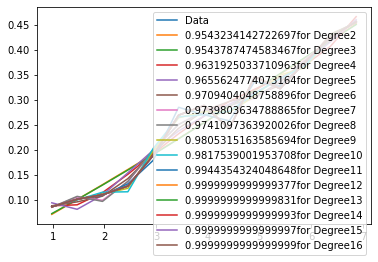

In [351]:
test_fits(generated_models, degrees_to_fit, masses, distances)

## Training and testing

In [352]:
def create_quadratic(a,b,c, x_vals):
    y_vals = []
    for x in x_vals:
        theoretical_val = a*x**2 + b*x + c
        with_noise = theoretical_val + random.gauss(0,35)
        y_vals.append(with_noise)
    
    return y_vals
    
    

In [359]:
quad_data_x_vals = range(-10,11)

In [360]:
quad_data_1 = create_quadratic(3,0,0, quad_data_x_vals)

In [361]:
quad_data_2 = create_quadratic(3,0,0, quad_data_x_vals)

We will train models on both datasets and then test them on the other.

###### Generating fits on data 1

In [363]:
models_data_1 = generate_fits(quad_data_x_vals, quad_data_1, [2,4,8,16])

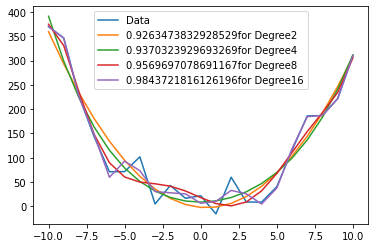

In [366]:
test_fits(models_data_1, [2,4,8,16], quad_data_x_vals, quad_data_1) #degree 16 model has remarkably high r_squared

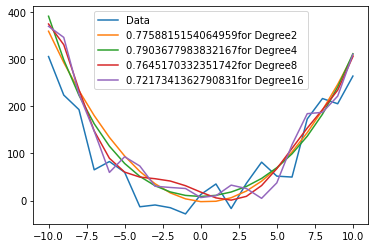

In [368]:
test_fits(models_data_1, [2,4,8,16], quad_data_x_vals, quad_data_2) #the degree 2 polynomial has the best r squared

###### Generating fits on data 2

In [370]:
models_data_2 = generate_fits(quad_data_x_vals, quad_data_2, [2,4,8,16])

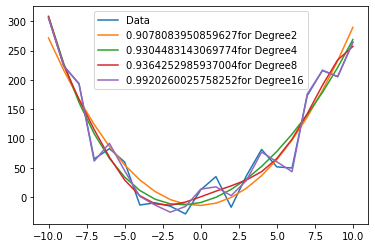

In [371]:
test_fits(models_data_2, [2,4,8,16], quad_data_x_vals, quad_data_2) #degree 16 has very high accuracy

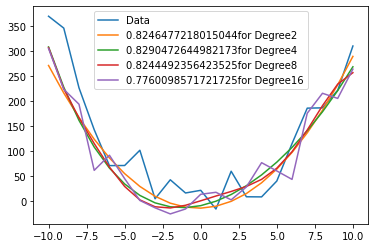

In [373]:
test_fits(models_data_2, [2,4,8,16], quad_data_x_vals, quad_data_1) #degree 2 has the best accuracy

#### Fitting a quadratic to a line

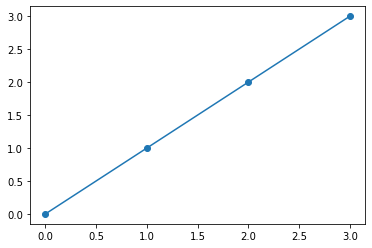

In [376]:
x_vals = [0,1,2,3]
y_vals = x_vals
model_quad = np.polyfit(x_vals, y_vals, 2)
est_vals = np.polyval(model_quad, x_vals)
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, est_vals)

Even though we fit a quadratic to the linear data, the extra term doesn't matter as there is no noise in the data

Now we will add a tiny bit of noise to the data

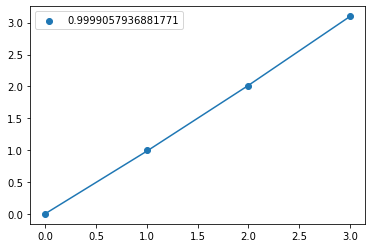

In [378]:
x_vals = [0,1,2,3]
y_vals = [0,1,2,3.1]
model_quad = np.polyfit(x_vals, y_vals, 2)
est_vals = np.polyval(model_quad, x_vals)
error = r_squared(y_vals, est_vals)
plt.scatter(x_vals, y_vals, label = str(error))
plt.plot(x_vals, est_vals)
plt.legend()

adding an extra point to the above data

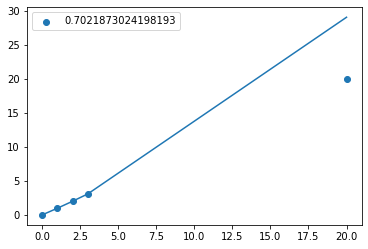

In [379]:
x_vals = [0,1,2,3, 20]
y_vals = [0,1,2,3.1, 20]
est_vals = np.polyval(model_quad, x_vals)
error = r_squared(y_vals, est_vals)
plt.scatter(x_vals, y_vals, label = str(error))
plt.plot(x_vals, est_vals)
plt.legend()

The problem can be rectified greatly if we fit the appropriate curve, i.e. a line to the data

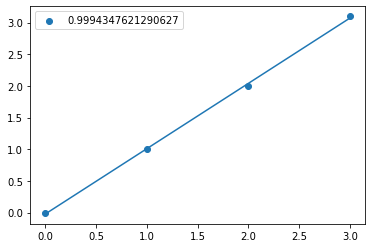

In [381]:
x_vals = [0,1,2,3]
y_vals = [0,1,2,3.1]
model_quad = np.polyfit(x_vals, y_vals, 1)
est_vals = np.polyval(model_quad, x_vals)
error = r_squared(y_vals, est_vals)
plt.scatter(x_vals, y_vals, label = str(error))
plt.plot(x_vals, est_vals)
plt.legend()

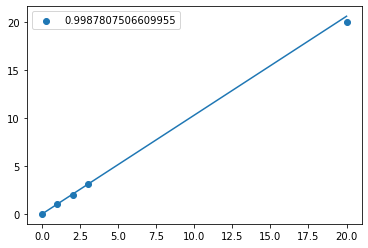

In [382]:
x_vals = [0,1,2,3,20]
y_vals = [0,1,2,3.1,20]
est_vals = np.polyval(model_quad, x_vals)
error = r_squared(y_vals, est_vals)
plt.scatter(x_vals, y_vals, label = str(error))
plt.plot(x_vals, est_vals)
plt.legend()

## Cross Validation

In [384]:
temps = pd.read_csv(r'C:\Users\Yogen\Documents\1. Data Science Courses\2. MIT Data Science Course\Lecture8\temperatures.csv')

In [385]:
temps.head()

,CITY,TEMP,DATE
0,SEATTLE,3.10,19610101
1,SEATTLE,0.55,19610102
2,SEATTLE,0.00,19610103
3,SEATTLE,4.45,19610104
4,SEATTLE,8.35,19610105


In [396]:
temps["YEAR"] = [str(x)[:4] for x in list(temps["DATE"])]

In [397]:
temps.head()

,CITY,TEMP,DATE,YEAR
0,SEATTLE,3.10,19610101,1961
1,SEATTLE,0.55,19610102,1961
2,SEATTLE,0.00,19610103,1961
3,SEATTLE,4.45,19610104,1961
4,SEATTLE,8.35,19610105,1961


In [404]:
temperatures = list(temps.groupby("YEAR").mean()["TEMP"])

In [445]:
years = list(range(55))

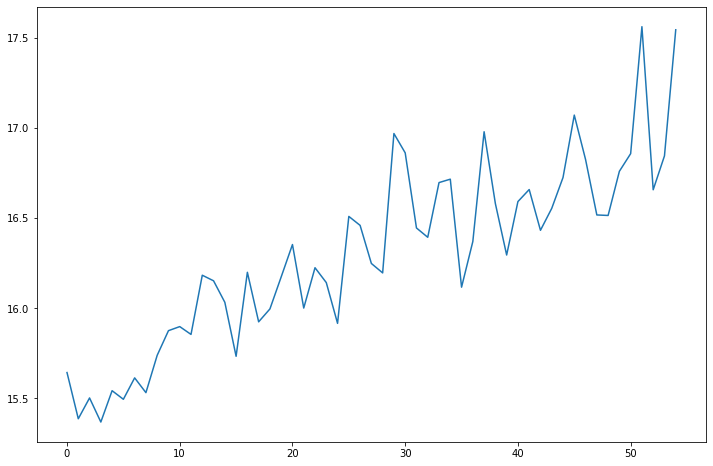

In [446]:
plt.figure(figsize=(12,8))
plt.plot(years, temperatures)

We will divide the dataset into halfs n times and then train the model on half the data and test on the other half.

In [478]:
def test_fits_for_error(models, degrees, x_vals, y_vals):
    errors = {}
    for i in range(len(models)):
        predicted_vals = np.polyval(models[i], x_vals)
        error = r_squared(y_vals, predicted_vals)
        errors[degrees[i]] = [error]
    return errors

In [506]:
n=10
data_dict = dict(zip(years, temperatures))
r_squared_values = None
degrees = [1,2,3,4]
for i in range(n):
    half_of_years = random.sample(years, len(years)//2)
    half_of_temperatures = [data_dict[key] for key in half_of_years]
    
    models = generate_fits(half_of_years, half_of_temperatures, degrees) #models trained on 1 half of the dataset
    
    other_half_of_years = list(np.setdiff1d(years, half_of_years))
    other_half_of_temperatures = [data_dict[key] for key in other_half_of_years]
    
    if r_squared_values == None:
        r_squared_values = test_fits_for_error(models, degrees, other_half_of_years, other_half_of_temperatures)
    else:
        for i in degrees:
            new_r_squared_values = test_fits_for_error(models, degrees, other_half_of_years, other_half_of_temperatures)
            r_squared_values[i].append(new_r_squared_values[i][0])

mean_r_squared_values = dict(pd.DataFrame(r_squared_values).mean())
std_r_squared_values = dict(pd.DataFrame(r_squared_values).std())

In [507]:
mean_r_squared_values

{1: 0.7459498189354161,
 2: 0.7321137922086645,
 3: 0.7267186556681539,
 4: 0.7242722645860956}

In [513]:
std_r_squared_values

{1: 0.06271713681765867,
 2: 0.06764392403856252,
 3: 0.07514687358431354,
 4: 0.0655906747879804}

These are the average values of r squared for the 5 iterations (n=5) I ran above. The linear model has the highest r squared and the r squared has the lowest standard deviation. it's the best model

In [132]:
10**-5*24568

0.24568

In [291]:
multipliers = [100,1000,10000,1000000,10**6,10**7,10**8,10**9,0.01,0.001,0.001,0.0001]
questions = []
converted = []
num_questions = 4
for i in range(num_questions):
    multiplier = random.choice(multipliers)
    number = random.random()
    questions.append(number)
    converted_numb = multiplier*number
    converted.append(converted_numb)
assignment_dict = dict(zip(questions, converted))
for i in range(num_questions):
    print("Question",str(i+1)+".",list(assignment_dict.keys())[i], "to",list(assignment_dict.values())[i] )

Question 1. 0.7830584199038205 to 783058419.9038205
Question 2. 0.46119037363762083 to 0.00046119037363762084
Question 3. 0.08725725867098733 to 87257.25867098733
Question 4. 0.7871823700371606 to 0.007871823700371606


In [292]:
assignment_dict

{0.7830584199038205: 783058419.9038205,
 0.46119037363762083: 0.00046119037363762084,
 0.08725725867098733: 87257.25867098733,
 0.7871823700371606: 0.007871823700371606}

In [153]:
questions

[0.19511908365880404,
 0.18862525477812775,
 0.4167154486294413,
 0.4026034633460117,
 0.37717090509690887,
 0.45778477130100204,
 0.1612925543183389,
 0.5731547801159959,
 0.9661899793657518,
 0.3437565543714355,
 0.2584750958328803,
 0.7259446128344205,
 0.25301072822071524,
 0.5350488361063608,
 0.5782777183210412,
 0.0210550296822124,
 0.028267853797542153,
 0.21606969132455578,
 0.5596030528150903,
 0.31330687411460467]

In [154]:
converted

[195119083.65880403,
 1886252.5477812774,
 0.00041671544862944133,
 0.0004026034633460117,
 0.0003771709050969089,
 45.77847713010021,
 161.2925543183389,
 573154.7801159959,
 9661.899793657518,
 0.0003437565543714355,
 258475.0958328803,
 7259.446128344204,
 253010.72822071525,
 0.005350488361063608,
 0.0005782777183210413,
 210550.29682212402,
 28267853.79754215,
 2160696.913245558,
 5596030.528150903,
 0.00031330687411460466]

In [155]:
assignment_dict = dict(zip(questions, converted))

In [156]:
for i in range(20):
    print("Question",str(i+1)+".",list(assignment_dict.keys())[i], "to",list(assignment_dict.values())[i] )

Question 1. 0.19511908365880404 to 195119083.65880403
Question 2. 0.18862525477812775 to 1886252.5477812774
Question 3. 0.4167154486294413 to 0.00041671544862944133
Question 4. 0.4026034633460117 to 0.0004026034633460117
Question 5. 0.37717090509690887 to 0.0003771709050969089
Question 6. 0.45778477130100204 to 45.77847713010021
Question 7. 0.1612925543183389 to 161.2925543183389
Question 8. 0.5731547801159959 to 573154.7801159959
Question 9. 0.9661899793657518 to 9661.899793657518
Question 10. 0.3437565543714355 to 0.0003437565543714355
Question 11. 0.2584750958328803 to 258475.0958328803
Question 12. 0.7259446128344205 to 7259.446128344204
Question 13. 0.25301072822071524 to 253010.72822071525
Question 14. 0.5350488361063608 to 0.005350488361063608
Question 15. 0.5782777183210412 to 0.0005782777183210413
Question 16. 0.0210550296822124 to 210550.29682212402
Question 17. 0.028267853797542153 to 28267853.79754215
Question 18. 0.21606969132455578 to 2160696.913245558
Question 19. 0.5596

In [157]:
list(assignment_dict.values())[0]

195119083.65880403

In [218]:
questions

[0.19511908365880404,
 0.18862525477812775,
 0.4167154486294413,
 0.4026034633460117,
 0.37717090509690887,
 0.45778477130100204,
 0.1612925543183389,
 0.5731547801159959,
 0.9661899793657518,
 0.3437565543714355,
 0.2584750958328803,
 0.7259446128344205,
 0.25301072822071524,
 0.5350488361063608,
 0.5782777183210412,
 0.0210550296822124,
 0.028267853797542153,
 0.21606969132455578,
 0.5596030528150903,
 0.31330687411460467]

In [219]:
converted

[195119083.65880403,
 1886252.5477812774,
 0.00041671544862944133,
 0.0004026034633460117,
 0.0003771709050969089,
 45.77847713010021,
 161.2925543183389,
 573154.7801159959,
 9661.899793657518,
 0.0003437565543714355,
 258475.0958328803,
 7259.446128344204,
 253010.72822071525,
 0.005350488361063608,
 0.0005782777183210413,
 210550.29682212402,
 28267853.79754215,
 2160696.913245558,
 5596030.528150903,
 0.00031330687411460466]

In [221]:
answers = []
for i in range(len(questions)):
    answer = questions[i]/converted[i]
    answers.append(answer)

In [222]:
answers

[1e-09,
 1.0000000000000001e-07,
 1000.0,
 1000.0,
 999.9999999999999,
 0.009999999999999998,
 0.001,
 1e-06,
 0.0001,
 1000.0,
 1e-06,
 0.0001,
 1e-06,
 99.99999999999999,
 999.9999999999999,
 1e-07,
 1e-09,
 1e-07,
 1e-07,
 1000.0]

In [223]:
1/1000


0.001

In [229]:
d = {}

In [231]:
type(d)

dict

In [232]:
d = {"Name":"Adi", "Class":"7","Age":"12"}

In [234]:
d["Name"]

'Adi'

In [235]:
d.keys()

dict_keys(['Name', 'Class', 'Age'])

In [236]:
d.values()

dict_values(['Adi', '7', '12'])

In [240]:
d = {"Name":["Adi", "Ayu"], "Class":["7","LKG"],"Age":["12","5"]}

In [243]:
d["Name"]

['Adi', 'Ayu']

In [246]:
d["class"]

KeyError: 'class'

In [247]:
d.keys()

dict_keys(['Name', 'Class', 'Age'])

In [248]:
d.values()

dict_values([['Adi', 'Ayu'], ['7', 'LKG'], ['12', '5']])

In [252]:
d = {1:"A", 2:"D", 1:"E"}

In [250]:
d[1]

'E'

In [256]:
d = {"Student NAMES": "Adi", "Class":"7", "Teacher NAMES":"Shailesh"}

In [257]:
d["Student NAMES"]

'Adi'

In [260]:
d = {"Stud":[1,2,"Ad",[4,5,{"A":1}]]}

In [261]:
d["Stud"]

[1, 2, 'Ad', [4, 5, {'A': 1}]]

In [267]:
adi_dictionary = {"Names":["Adi", "Ayu"]}

In [264]:
adi_dictionary["Roll No."] 

In [268]:
adi_dictionary["Names"]

['Adi', 'Ayu']

In [270]:
adi_dictionary["Roll No."] = ["1","2"]

In [271]:
adi_dictionary

{'Names': ['Adi', 'Ayu'], 'Roll No.': ['1', '2']}

In [273]:
adi_dictionary["Project"] = ["not completed","completed"]

In [274]:
adi_dictionary

{'Names': ['Adi', 'Ayu'],
 'Roll No.': ['1', '2'],
 'Project': ['not completed', 'completed']}

In [275]:
adi_dictionary["Project"]

['not completed', 'completed']

In [279]:
adi_dictionary[1] = ["s"]

In [280]:
adi_dictionary

{'Names': ['Adi', 'Ayu'],
 'Roll No.': ['1', '2'],
 'Project': ['not completed', 'completed'],
 1: ['s']}

In [281]:
adi_dictionary[0.5] = "sh"

In [282]:
adi_dictionary

{'Names': ['Adi', 'Ayu'],
 'Roll No.': ['1', '2'],
 'Project': ['not completed', 'completed'],
 1: ['s'],
 0.5: 'sh'}

In [284]:
adi_dictionary[[234]] = "qy" #list ko key nahi bna skte

TypeError: unhashable type: 'list'

In [285]:
l = ["sab ke roll no"] #mutable

In [286]:
adi_dictionary[l] = [23,56]

TypeError: unhashable type: 'list'

In [287]:
adi_dictionary = {l:[23,56]}

TypeError: unhashable type: 'list'

In [288]:
adi_dictionary[["sab ke roll no"]]

TypeError: unhashable type: 'list'

In [289]:
l.append("skjskj")

In [290]:
l

['sab ke roll no', 'skjskj']